# Imports

In [8]:
import os
import cv2
import numpy as np
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt


# Configuration

In [2]:
DATA_DIR = "../data"
RAW_DIR = os.path.join(DATA_DIR, "raw")
PROCESSED_DIR = os.path.join(DATA_DIR, "processed")
IMG_HEIGHT = 256
IMG_WIDTH = 512
NUM_CLASSES = 8


# Class Mapping

In [3]:
CLASS_MAPPING = {
    0: 0,    # 'unlabeled'            -> background
    1: 0,    # 'ego vehicle'          -> background
    2: 0,    # 'rectification border' -> background
    3: 0,    # 'out of roi'           -> background
    4: 0,    # 'static'               -> background
    5: 0,    # 'dynamic'              -> background
    6: 0,    # 'ground'               -> background
    7: 1,    # 'road'                 -> road
    8: 2,    # 'sidewalk'             -> sidewalk
    9: 0,    # 'parking'              -> background
    10: 0,   # 'rail track'           -> background
    11: 3,   # 'building'             -> building
    12: 0,   # 'wall'                 -> background
    13: 4,   # 'fence'                -> fence
    14: 0,   # 'guard rail'           -> background
    15: 0,   # 'bridge'               -> background
    16: 0,   # 'tunnel'               -> background
    17: 0,    # 'pole'                 -> background
    18: 0,    # 'polegroup'            -> background
    19: 0,    # 'traffic light'        -> background
    20: 0,    # 'traffic sign'         -> background
    21: 5,   # 'vegetation'           -> vegetation
    22: 0,   # 'terrain'              -> background
    23: 6,   # 'sky'                  -> sky
    24: 7,   # 'person'               -> person
    25: 7,   # 'rider'                -> person (regroupement)
    26: 8,   # 'car'                  -> car
    27: 8,   # 'truck'                -> car (regroupement)
    28: 8,   # 'bus'                  -> car (regroupement)
    29: 8,   # 'caravan'              -> car (regroupement)
    30: 8,   # 'trailer'              -> car (regroupement)
    31: 8,   # 'train'                -> car (regroupement)
    32: 8,   # 'motorcycle'           -> vehicle
    33: 8,   # 'bicycle'              -> vehicle
    -1: 0     # 'license plate'        -> background
}


# Fonctions Utilitaires

In [4]:
def remap_classes(mask, mapping):
    remapped_mask = np.zeros_like(mask, dtype=np.uint8)
    for old_class, new_class in mapping.items():
        remapped_mask[mask == old_class] = new_class
    return remapped_mask

def get_city_name(image_path):
    return image_path.split('/')[-2]

def get_image_name(image_path):
    return image_path.split('/')[-1].split('_leftImg8bit')[0]


# Définition de la fonction de préparation des données

In [5]:
def prepare_data(image_dir, gt_dir, output_dir, class_mapping, img_height, img_width, dataset_type):
    """
    Prépare les données en remappant les classes des masques de segmentation,
    en redimensionnant les images et les masques, et en les sauvegardant dans un
    nouveau répertoire.
    """
    print(f"Préparation des données pour le dataset : {dataset_type}")

    # Créer les répertoires de sortie s'ils n'existent pas
    os.makedirs(output_dir, exist_ok=True)

    # Définir les chemins des images et des masques en fonction du type de dataset
    image_dir = os.path.join(image_dir, dataset_type)
    gt_dir = os.path.join(gt_dir, dataset_type)
    output_dir = os.path.join(output_dir, dataset_type)

    # Parcourir les villes
    for city in tqdm(os.listdir(image_dir), desc="Processing Cities"):
        city_image_dir = os.path.join(image_dir, city)
        city_gt_dir = os.path.join(gt_dir, city)
        city_output_dir = os.path.join(output_dir, city)
        os.makedirs(city_output_dir, exist_ok=True)

        # Parcourir les images
        for image_file in os.listdir(city_image_dir):
            if image_file.endswith('.png'):
                image_name = get_image_name(image_file)
                image_path = os.path.join(city_image_dir, image_file)
                mask_path = os.path.join(city_gt_dir, f"{image_name}_gtFine_labelIds.png")
                output_image_path = os.path.join(city_output_dir, f"{image_name}_image.png")
                output_mask_path = os.path.join(city_output_dir, f"{image_name}_mask.png")

                # Charger l'image et le masque
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

                # Redimensionner l'image et le masque
                image = cv2.resize(image, (img_width, img_height))
                mask = cv2.resize(mask, (img_width, img_height), interpolation=cv2.INTER_NEAREST)

                # Remaaper les classes du masque
                remapped_mask = remap_classes(mask, class_mapping)

                # Sauvegarder l'image et le masque remappé
                cv2.imwrite(output_image_path, image)
                cv2.imwrite(output_mask_path, remapped_mask)

    print(f"Préparation des données terminée pour le dataset : {dataset_type}")


# Préparation des données

In [6]:
DATASET_TYPES = ['train', 'val', 'test']

for dataset_type in DATASET_TYPES:
    prepare_data(
        image_dir=os.path.join(RAW_DIR, "leftImg8bit"),
        gt_dir=os.path.join(RAW_DIR, "gtFine"),
        output_dir=PROCESSED_DIR,
        class_mapping=CLASS_MAPPING,
        img_height=IMG_HEIGHT,
        img_width=IMG_WIDTH,
        dataset_type=dataset_type
    )

print("Préparation des données terminée pour tous les datasets.")


Préparation des données pour le dataset : train


Processing Cities: 100%|████████████████████████| 18/18 [05:18<00:00, 17.67s/it]


Préparation des données terminée pour le dataset : train
Préparation des données pour le dataset : val


Processing Cities: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:07<00:00, 22.62s/it]


Préparation des données terminée pour le dataset : val
Préparation des données pour le dataset : test


Processing Cities: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [02:56<00:00, 29.34s/it]

Préparation des données terminée pour le dataset : test
Préparation des données terminée pour tous les datasets.


# Vérification

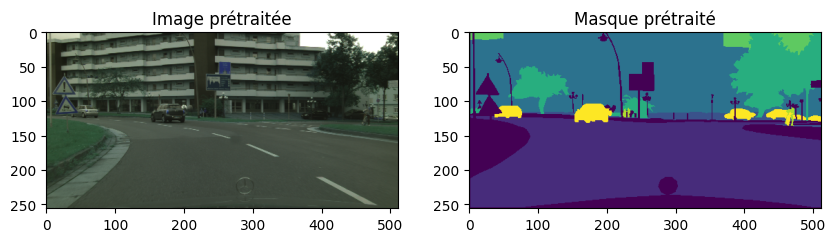

Valeurs uniques dans le masque : [0 1 2 3 5 6 7 8]


In [9]:
# Charger une image et un masque prétraités
image = cv2.imread("../data/processed/train/aachen/aachen_000000_000019_image.png")
mask = cv2.imread("../data/processed/train/aachen/aachen_000000_000019_mask.png", cv2.IMREAD_UNCHANGED)

# Afficher l'image et le masque
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image prétraitée")
plt.subplot(1, 2, 2)
plt.imshow(mask)
plt.title("Masque prétraité")
plt.show()

# Afficher les valeurs uniques dans le masque
print("Valeurs uniques dans le masque :", np.unique(mask))
